<a href="https://colab.research.google.com/github/ayuri1512/Data-Science-Projects/blob/main/price_optimization_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [9]:
uploaded = files.upload()

Saving Competition_Data.csv to Competition_Data.csv


In [10]:
df = pd.read_csv("Competition_Data.csv")

In [11]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [12]:
df.dtypes

Index                         int64
Fiscal_Week_ID               object
Store_ID                     object
Item_ID                      object
Price                       float64
Item_Quantity                 int64
Sales_Amount_No_Discount    float64
Sales_Amount                float64
Competition_Price           float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [14]:
df.replace('?', np.nan, inplace=True)
null_values = df.isnull().sum()
print(null_values)

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64


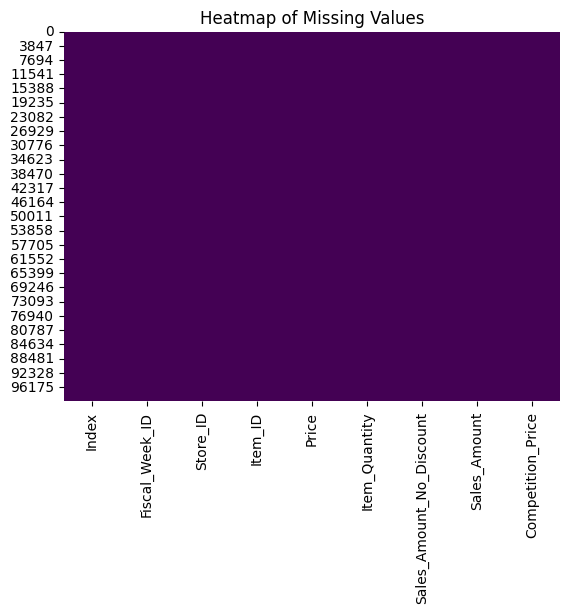

In [15]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [17]:
df.duplicated().sum()

0

In [19]:
df.head(5)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [32]:
print(df.nunique())

Index                       100000
Fiscal_Week_ID                   5
Store_ID                        10
Item_ID                        176
Price                         8105
Item_Quantity                  238
Sales_Amount_No_Discount      9911
Sales_Amount                  9941
Competition_Price             8151
dtype: int64


Histogram of numrical values


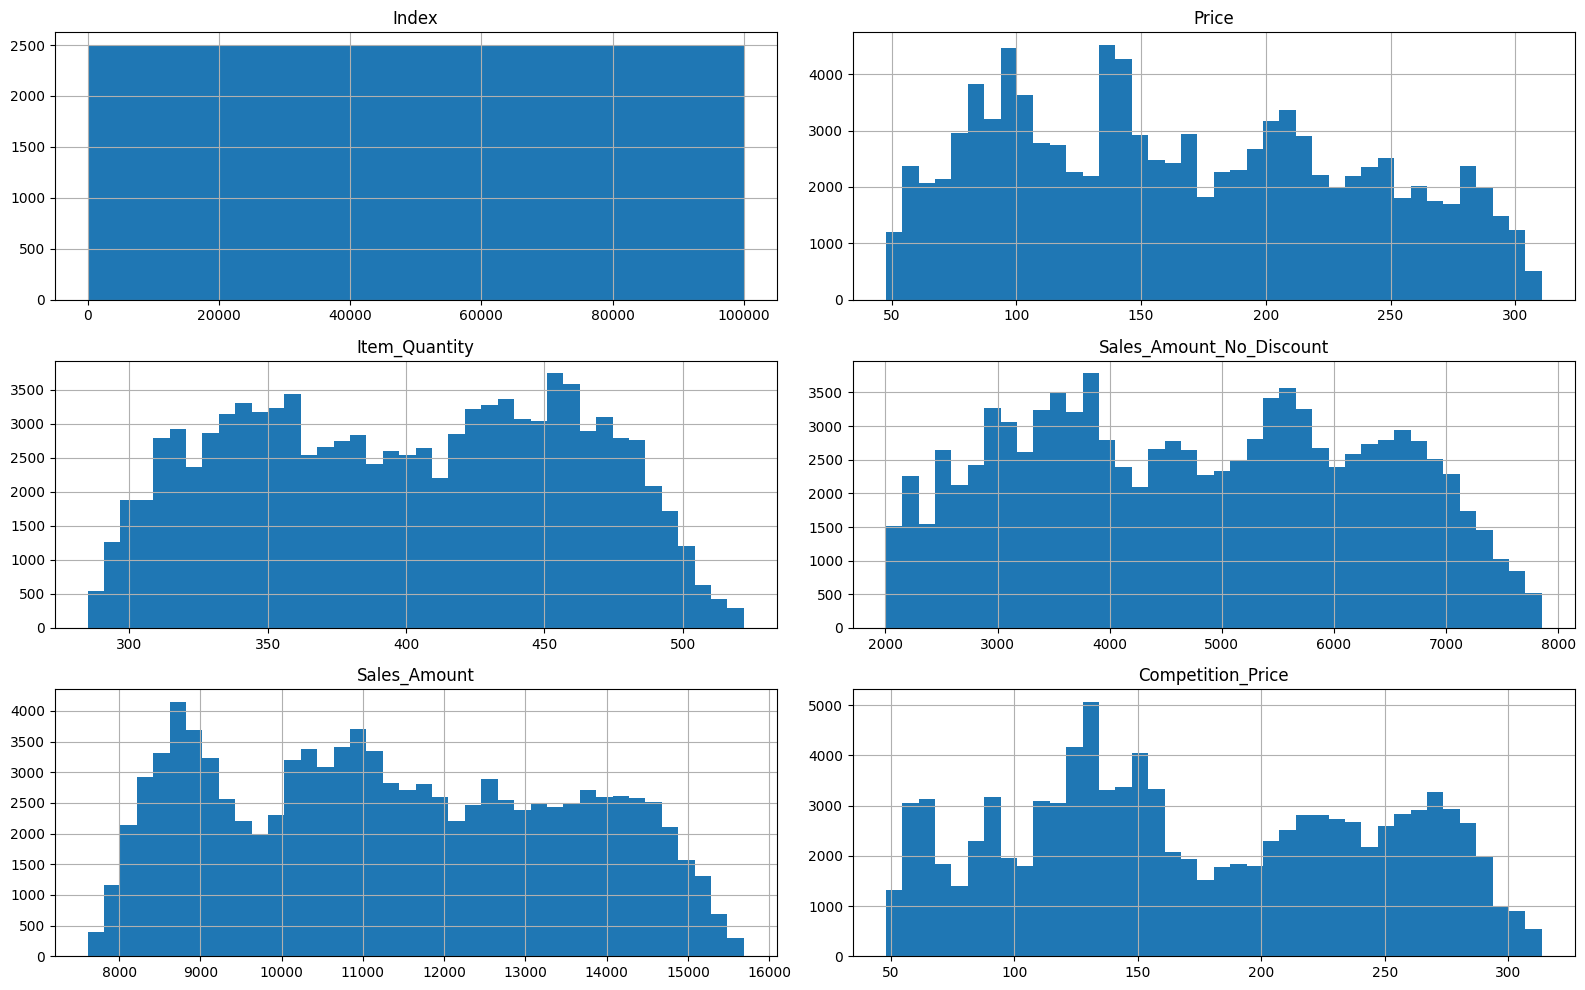

In [29]:
print('Histogram of numrical values')
df.hist(bins = 40, figsize = (16,10))
plt.tight_layout()
plt.show()

Boxplot of numerical values


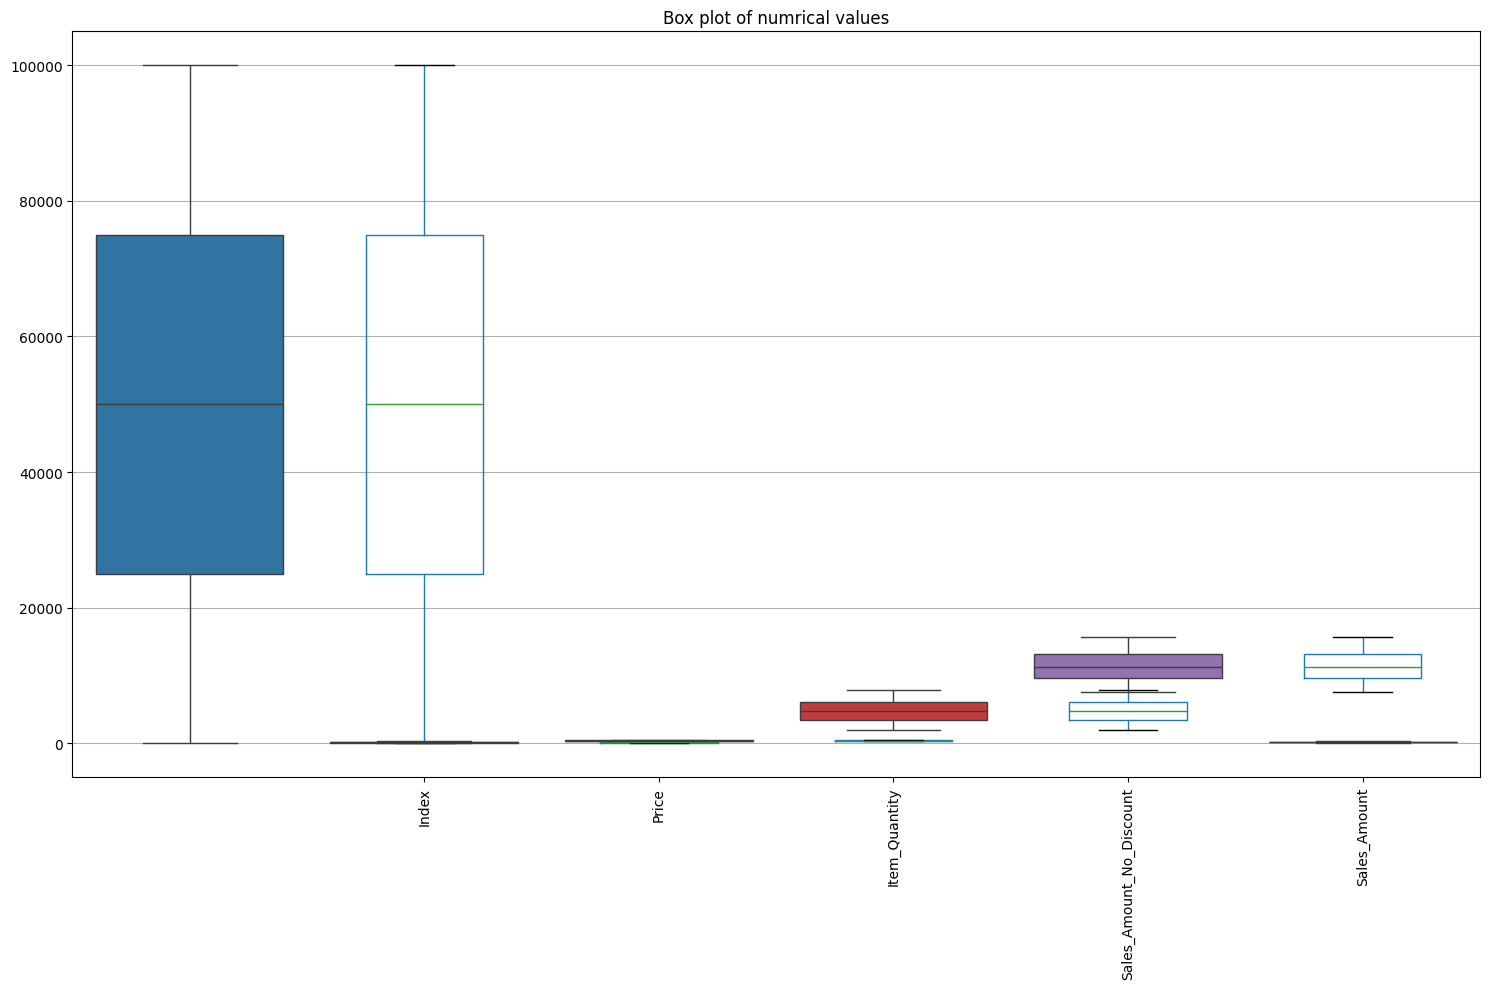

In [30]:

print("Boxplot of numerical values")
df.boxplot(figsize = (15,10))
sns.boxplot(data = df.select_dtypes(include=['number']))
plt.title("Box plot of numrical values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


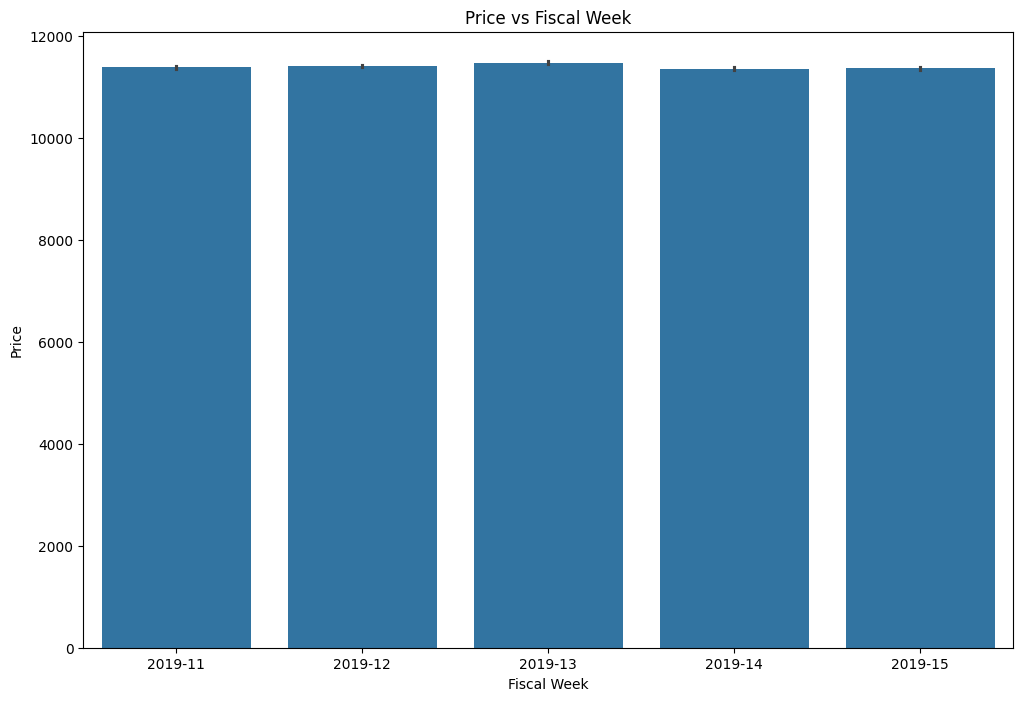

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Fiscal_Week_ID", y = "Sales_Amount", data = df)
plt.title('Price vs Fiscal Week')
plt.xlabel('Fiscal Week')
plt.ylabel('Price')
plt.show()